In [1]:
# Import basic libararies which are helpful in  data cleaning , manipulation & visualization .
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (18,8)
import klib

In [2]:
# Import all three datasets 
detail = pd.read_csv("Sales Details.csv")
order = pd.read_csv("Sales Orders.csv")
target = pd.read_csv("Sales Targets.csv")


In [3]:
detail.head(2)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole


In [4]:
order.head(2)

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune


In [5]:
target.head(2)

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0


## Exploring Datasets

In [6]:
# Show me No. (rows, columns) of datasets
print(detail.shape)
print(order.shape)
print(target.shape)

(1500, 6)
(560, 5)
(36, 3)


In [7]:
# show me basic information about my datasets
print(detail.info())
print(order.info())
print(target.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
None
<class 'pandas.core.frame.DataFrame'>


In [8]:
# show unique values in each coloums
print(detail.nunique())
print(order.nunique())
print(target.nunique())

Order ID        500
Amount          585
Profit          401
Quantity         14
Category          3
Sub-Category     17
dtype: int64
Order ID        500
Order Date      307
CustomerName    332
State            19
City             24
dtype: int64
Month of Order Date    12
Category                3
Target                 16
dtype: int64


In [9]:
# Drop duplicates from  datasets
detail.drop_duplicates(keep="first",inplace = True)
order.drop_duplicates(keep="first",inplace = True)
target.drop_duplicates(keep="first",inplace = True)

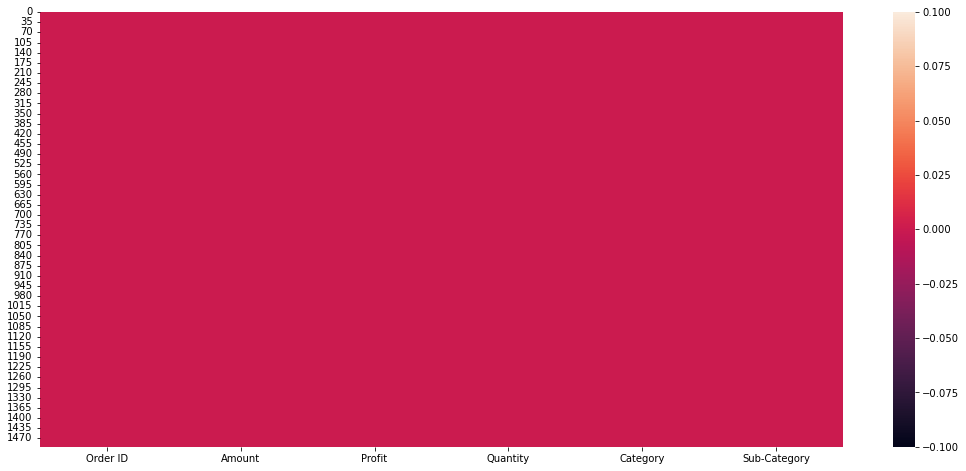

In [10]:
# show me "Null" values in detail dataset
sns.heatmap(detail.isnull())
matplotlib.rcParams["figure.figsize"] = (15,3) 

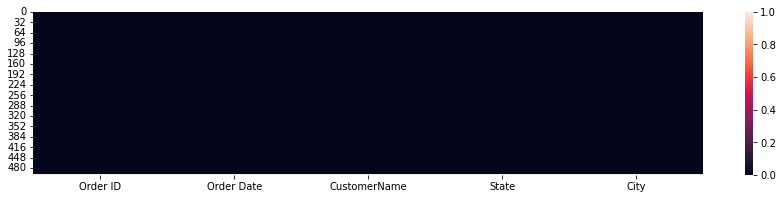

In [11]:
# show me "Null" values in order dataset
sns.heatmap(order.isnull())
matplotlib.rcParams["figure.figsize"] = (15,3) 

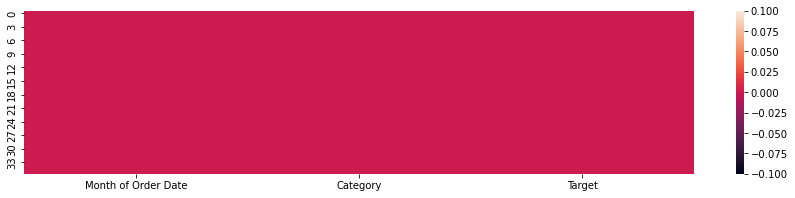

In [12]:
# show me "Null" values in target dataset
sns.heatmap(target.isnull())
matplotlib.rcParams["figure.figsize"] = (15,3) 

In [13]:
# Merge both detail & order dataset on the basis of there order ID
sales = pd.merge(detail, order, on='Order ID', how='left')

In [14]:
# Show Max columns or Rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [15]:
#Add new columns for month,year in sales dataset
sales["Year"] = pd.DatetimeIndex(sales["Order Date"]).year
sales["Month"] = pd.DatetimeIndex(sales["Order Date"]).month

In [16]:
sales.head(2)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,Year,Month
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad,2018,1
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad,2018,1


## Handle Outliers
1) Check the distribution of data for  detecting outliers 

2) Take action to remove outiers



In [17]:
sales.describe()

,Amount,Profit,Quantity,Year,Month
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,287.668000,15.970000,3.743333,2018.358000,6.050667
std,461.050488,169.140565,2.184942,0.479572,3.480447
min,4.000000,-1981.000000,1.000000,2018.000000,1.000000
25%,45.000000,-9.250000,2.000000,2018.000000,3.000000
50%,118.000000,9.000000,3.000000,2018.000000,6.000000
75%,322.000000,38.000000,5.000000,2019.000000,9.000000
max,5729.000000,1698.000000,14.000000,2019.000000,12.000000


In [18]:
sales["Amount"].quantile(.99)

2125.629999999999

In [19]:
sales["Amount"].quantile(.1)

24.0

In [20]:
sales["Profit"].quantile(.99)

564.03

In [21]:
sales["Profit"].quantile(.01)

-492.11

In [22]:
outliers = sales[(sales["Profit"]<=(-400)) & (sales["Amount"] >= (24))].index 
outliers 

Int64Index([   0,   22,   31,  117,  138,  198,  236,  249,  257,  365,  367,
             368,  467,  489,  504,  528,  529,  536,  585,  589,  605,  931,
             977, 1252],
           dtype='int64')

In [23]:
sales.drop(outliers, inplace =True)

In [24]:
#Nos. of dedecting outliers
outliers.value_counts().sum()

24

## Analysis & Visualization 

### Q.1 Which states are generating highest amount of sales ? 


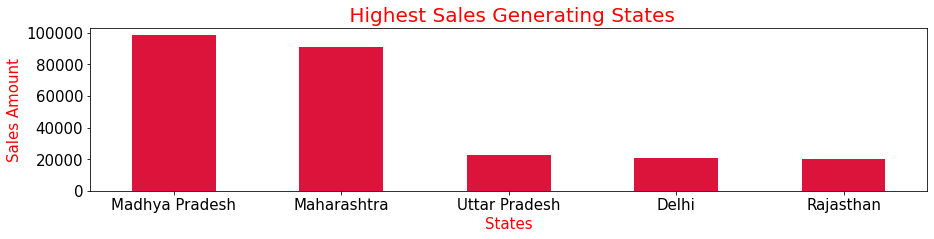

In [25]:
# Madhya Pradesh is generated highest amount of sales.
sales.groupby("State")["Amount"].sum().sort_values( ascending= False)[:5].plot.bar(color="crimson")
plt.xticks(rotation=0, fontsize=15 , color = "black" )
plt.yticks(rotation=0, fontsize=15 , color = "black" )
plt.rcParams["figure.figsize"] = (18,8)
plt.ylabel("Sales Amount",fontsize=15, color="r")
plt.xlabel("States",fontsize=15, color="r")
plt.title(" Highest Sales Generating States", fontsize=20, color="r")
plt.show()

### Q.2 Which are the top most selling sub-categories by amount ? 

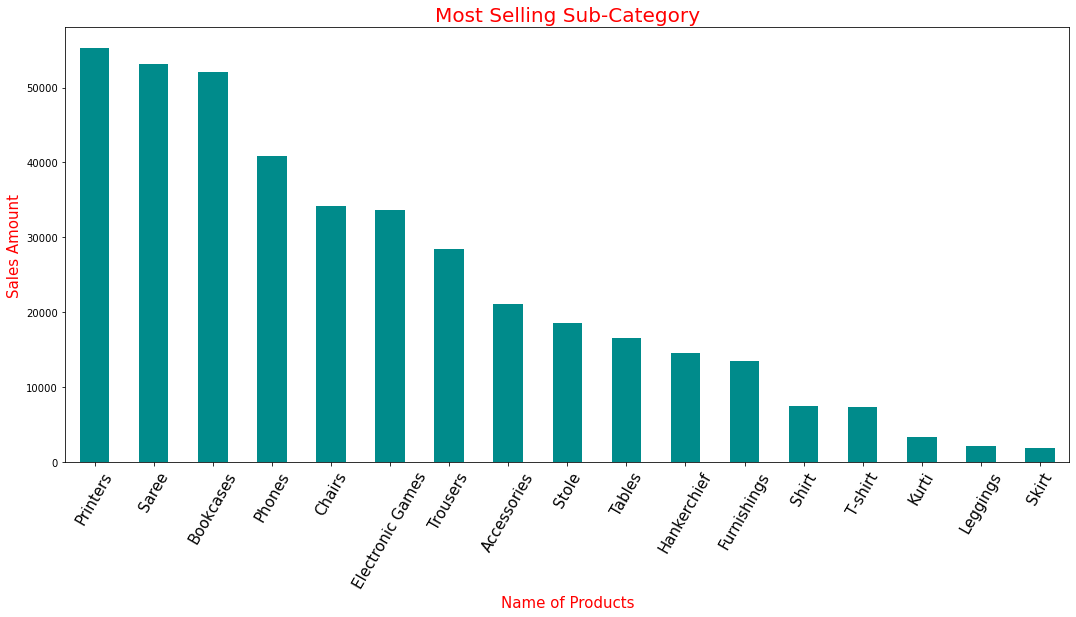

In [26]:
#  Prinetrs are the highest selling subcategory
sales_sub_cat = sales.groupby("Sub-Category")["Amount"].sum().sort_values(ascending = False).plot.bar(color="darkcyan")
plt.xticks(rotation=60, fontsize=15 , color = "black" )
plt.rcParams["figure.figsize"] = (18,8)
plt.xlabel("Name of Products",fontsize=15, color="r")
plt.ylabel("Sales Amount",fontsize=15, color="r")
plt.title("Most Selling Sub-Category", fontsize=20, color="r")
plt.show()

### Q.3 Which Category is most Proffitable ?

In [27]:
# Electronics is most proffitable category
sales_profit = (sales.groupby("Category")["Profit"].sum().sort_values(ascending=False))
sales_profit


Category
Electronics    19634.0
Clothing       12018.0
Furniture      10189.0
Name: Profit, dtype: float64

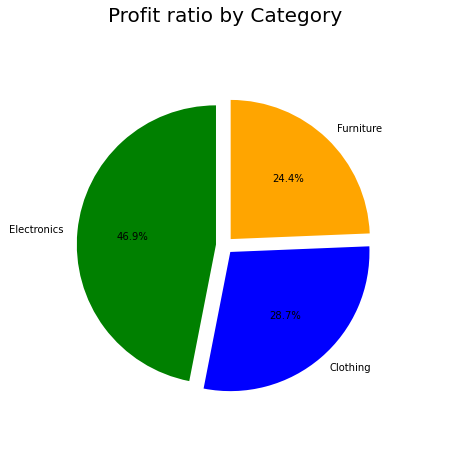

In [28]:
sales_profit = (19634,12018,10189)
cat=["Electronics","Clothing","Furniture"]
plt.pie (x=sales_profit, labels = cat ,colors = ["green" , "blue", "orange",], startangle=90, autopct = "%0.1f%%" ,explode=[0.05,0.05,0.05], radius= .8)
plt.title( "Profit ratio by Category" ,fontsize=20)
plt.show()

### Q.4 Which Category genrates most amount of sales ?

In [29]:
# Electronics category generated highest amount of sales 
sales_amt = sales.groupby(['Category'])['Amount'].sum().reset_index().sort_values(by=["Amount"],ascending=False)
sales_amt

,Category,Amount
1,Electronics,150905.0
0,Clothing,137060.0
2,Furniture,116370.0


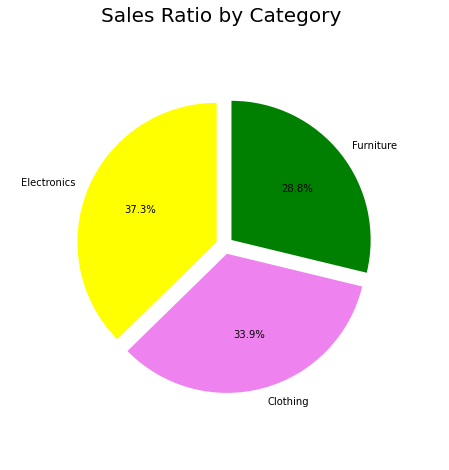

In [30]:
sales_amount = (150905,137060,116370)
cat=["Electronics","Clothing","Furniture"]
plt.pie (x=sales_amount, labels = cat ,colors = ["yellow" , "violet", "green",], startangle=90, autopct = "%0.1f%%" , explode=[0.05,0.05,0.05], radius= .8)
plt.title( "Sales Ratio by Category " ,fontsize=20)
plt.show()

### Q.5 Which are the 10 top most proffitable orders ?

In [31]:
sales.sort_values(by=["Profit"], ascending= True).reset_index()[:10]

,index,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,Year,Month
0,290,B-25698,516.0,-392.0,8,Furniture,Chairs,23-06-2018,Amisha,Tamil Nadu,Chennai,2018,6
1,533,B-25781,767.0,-353.0,5,Clothing,Trousers,14-09-2018,Rutuja,Gujarat,Ahmedabad,2018,9
2,60,B-25625,635.0,-349.0,5,Clothing,Saree,23-04-2018,Pinky,Jammu and Kashmir,Kashmir,2018,4
3,256,B-25688,352.0,-345.0,5,Clothing,Saree,11-06-2018,Swetha,Madhya Pradesh,Indore,2018,11
4,1431,B-26081,359.0,-338.0,5,Furniture,Bookcases,22-03-2019,Aarushi,Tamil Nadu,Chennai,2019,3
5,266,B-25693,632.0,-316.0,6,Clothing,Saree,18-06-2018,Parna,Madhya Pradesh,Bhopal,2018,6
6,578,B-25796,632.0,-316.0,6,Clothing,Saree,24-09-2018,Sukrith,Maharashtra,Mumbai,2018,9
7,458,B-25755,321.0,-315.0,5,Clothing,Saree,19-08-2018,Shourya,Kerala,Thiruvananthapuram,2018,8
8,583,B-25797,413.0,-314.0,9,Furniture,Chairs,30-09-2018,Sauptik,Madhya Pradesh,Indore,2018,9
9,453,B-25754,319.0,-312.0,5,Clothing,Saree,18-08-2018,Akshay,Bihar,Patna,2018,8


### Q.6 Top 5 cutomers who have spent the most amount ?

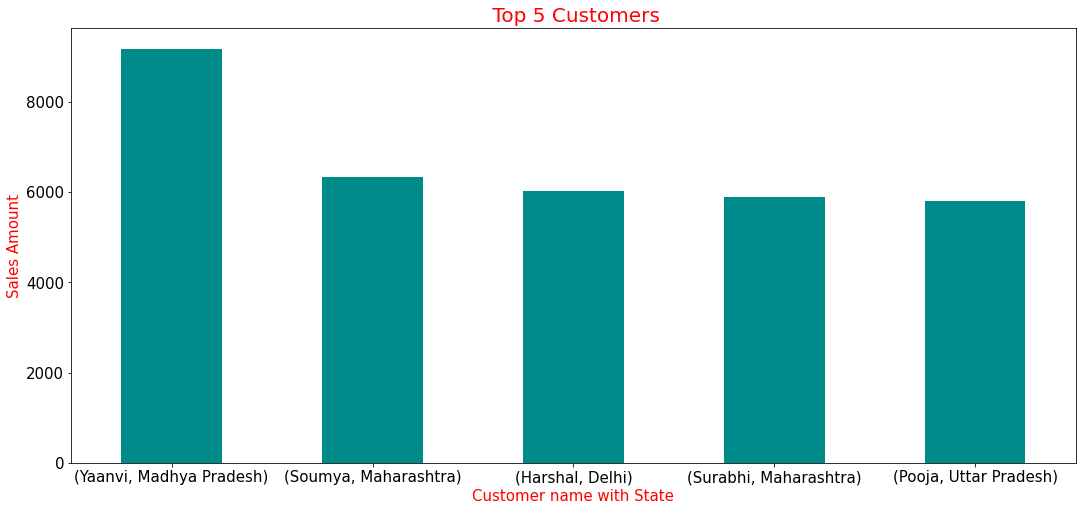

In [32]:
# Pooja spent highest amount on orders 
sales.groupby(["CustomerName","State"])["Amount"].sum().sort_values(ascending=False).head(5).plot.bar(color="darkcyan")
plt.xticks(rotation=0, fontsize=15 , color = "black" )
plt.yticks(rotation=0, fontsize=15 , color = "black" )
plt.rcParams["figure.figsize"] = (18,8)
plt.ylabel("Sales Amount",fontsize=15, color="r")
plt.xlabel("Customer name with State",fontsize=15, color="r")
plt.title(" Top 5 Customers", fontsize=20, color="r")
plt.show()


### Q.7 Which are the Top 10 states with most number of purchased items/ orders ?

In [33]:
cat_order = sales.groupby(['State'])['Category'].agg("count").sort_values(ascending=False).head(10)
state = cat_order.keys()
orders = [340,290,87,74,74,68,63,62,60,54]

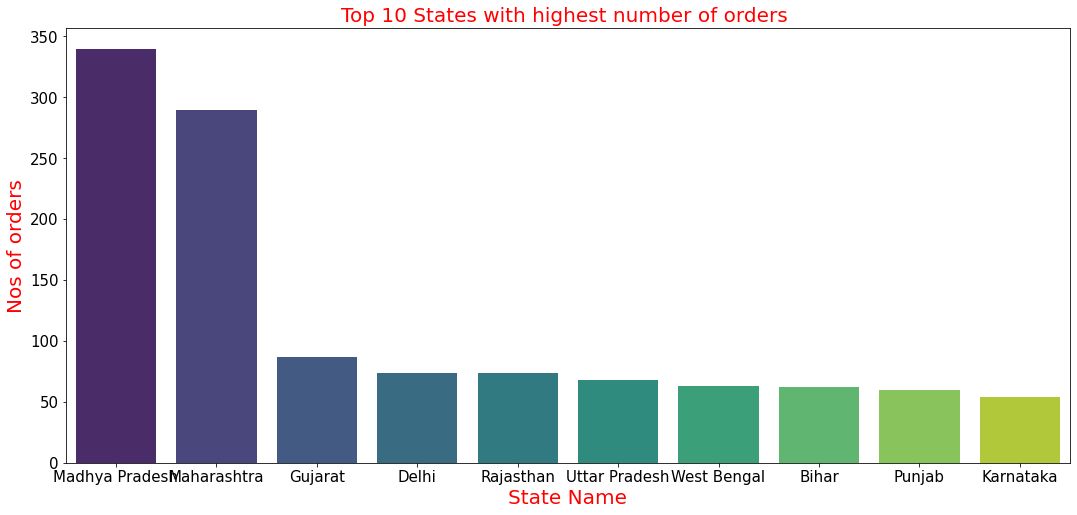

In [34]:
sns.barplot(x=state, y=orders, palette="viridis")
plt.xticks (rotation= 0 , fontsize=15 , color = "black" )
plt.yticks(fontsize=15 , color = "black" )
plt.rcParams["figure.figsize"] = (18,8)
plt.ylabel("Nos of orders",fontsize=20, color="r")
plt.xlabel("State Name",fontsize=20, color="r")
plt.title("Top 10 States with highest number of orders ", fontsize=20, color="r")
plt.show()


### Q.8 What is total amount of sales genrated per month ?

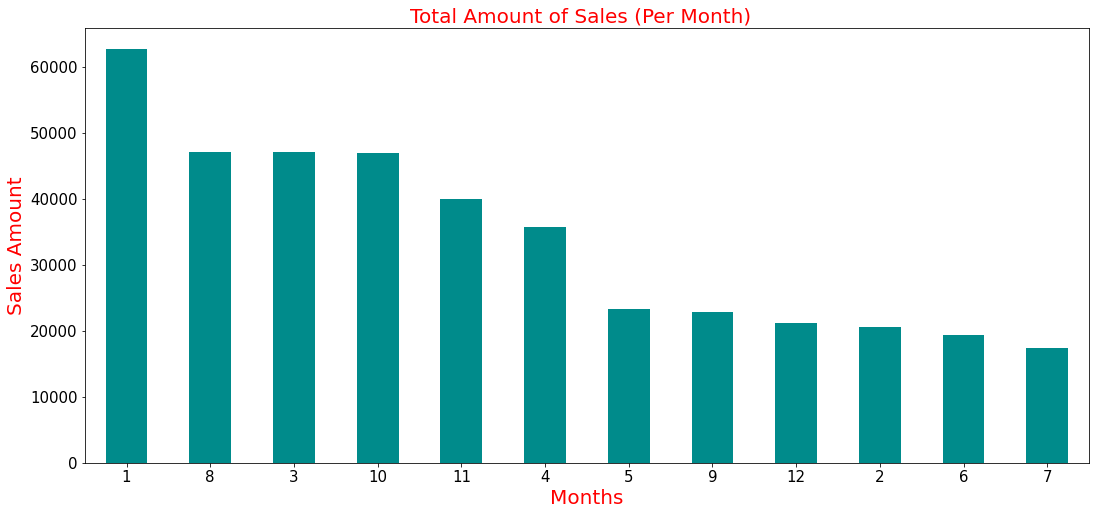

In [35]:
# January generates highest amount of sales
sales.groupby("Month")["Amount"].sum().sort_values(ascending=False).plot.bar(color="darkcyan")
plt.xticks (rotation= 0 , fontsize=15 , color = "black" )
plt.yticks(fontsize=15 , color = "black" )
plt.rcParams["figure.figsize"] = (18,8)
plt.ylabel("Sales Amount",fontsize=20, color="r")
plt.xlabel("Months",fontsize=20, color="r")
plt.title("Total Amount of Sales (Per Month)  ", fontsize=20, color="r")
plt.show()


### Q.9 What is the amount of Profit generated per month ?

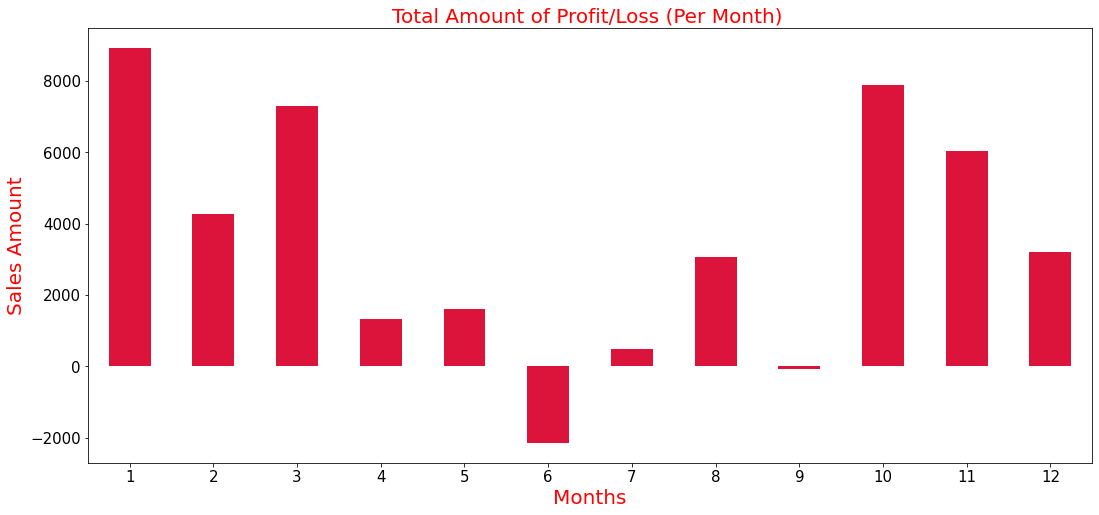

In [36]:
# January generates highest amount of profit
sales.groupby("Month")["Profit"].sum().plot.bar(color="crimson")
plt.xticks (rotation= 0 , fontsize=15 , color = "black" )
plt.yticks(fontsize=15 , color = "black" )
plt.rcParams["figure.figsize"] = (18,8)
plt.ylabel("Sales Amount",fontsize=20, color="r")
plt.xlabel("Months",fontsize=20, color="r")
plt.title("Total Amount of Profit/Loss (Per Month) ", fontsize=20, color="r")
plt.show()


### Q.10  Show me data of Sales Target v/s Actual sales generated ? 

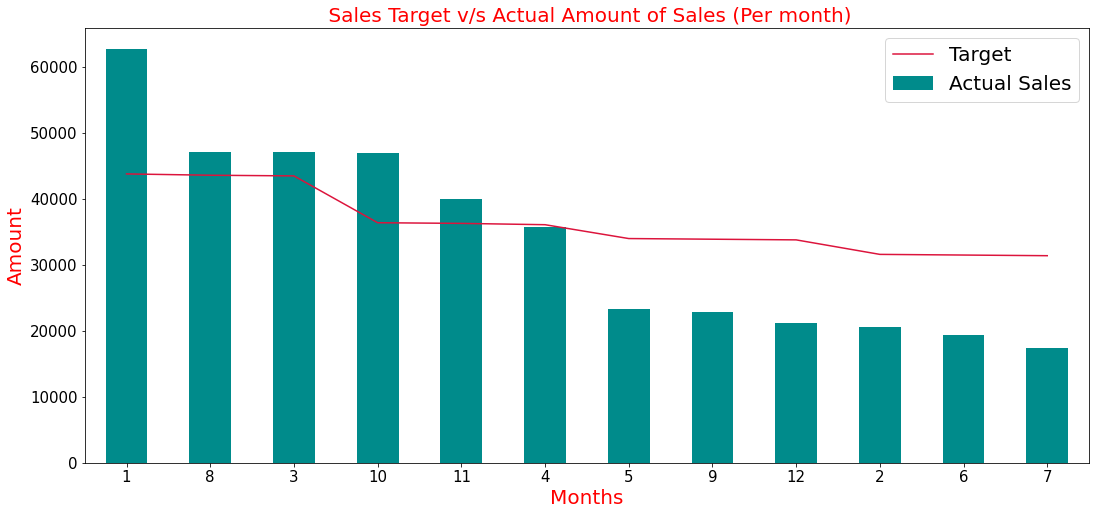

In [37]:
# Sales Target v/s Actual amount of Sales
target.groupby("Month of Order Date")["Target"].sum().sort_values(ascending=False).plot(color="crimson", label="Target")
sales.groupby("Month")["Amount"].sum().sort_values(ascending=False).plot.bar(color="Darkcyan",label= "Actual Sales")
plt.xticks (rotation= 0 , fontsize=15 , color = "black" )
plt.yticks(fontsize=15 , color = "black" )
plt.rcParams["figure.figsize"] = (18,8)
plt.ylabel("Amount",fontsize=20, color="r")
plt.xlabel("Months",fontsize=20, color="r")
plt.title(" Sales Target v/s Actual Amount of Sales (Per month)", fontsize=20, color="r")
plt.legend(loc="upper right",fontsize=20)
plt.show()

### Q.10 Sales target by Categories?

In [38]:
sales_target = target.groupby("Category")["Target"].sum()
pd.DataFrame(sales_target)

,Target
Category,
Clothing,174000.0
Electronics,129000.0
Furniture,132900.0


### Q.11 Actual sales by Categories ?

In [39]:
actual_sales = sales.groupby("Category")["Amount"].sum()
pd.DataFrame(actual_sales)

,Amount
Category,
Clothing,137060.0
Electronics,150905.0
Furniture,116370.0


### Q.12 Profit/Loss in sales by categories ?

In [40]:
# Electronics is in loss else two are in profit
Profit_loss = sales_target-actual_sales
pd.DataFrame(Profit_loss)

,0
Category,
Clothing,36940.0
Electronics,-21905.0
Furniture,16530.0


### Q.13 Total amount of revenue generated ?

In [41]:
total_revenue = sales["Amount"].sum()
total_revenue 

404335.0

### Q.14 Total amount of profit generated ?

In [42]:
total_profit = sales["Profit"].sum()
total_profit

41841.0

### Q.15 What is the Net profit  ?

In [43]:
net_profit = total_revenue-total_profit 
net_profit

362494.0

## Finally,we are here with some results:

### 1) According to analysis Madhya Pradesh is our best performing  state.

### 2) Electronics category generated highest amount of sales & it is most proffitable too.

### 3) Our Net Profit is 362494.

### 4) January month has highest sales & it is most proffitable too.

### 5) We could not reach at our targets in Electronics Category.


